# Graph Dominating Sets and Cliques
## Author: Snigdhayan Mahanta

I analyzed below the sizes of `dominating sets` and `maximal cliques` in a graph as a function of the connectivity or the number of edges in the graph. For this purpose I used the python package `NetworkX`.


In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import statistics
import scipy
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define graph creation functions

# Create an undirected graph based on the numbers of vertices and edges
def create_graph(n_vertices, n_edges):
    n_vertices = n_vertices
    n_edges = n_edges
    vertices = [i+1 for i in range(n_vertices)]
    self_edges = [(i+1,i+1) for i in range(n_vertices)]
    edges = [random.sample(vertices, k=2) for _ in range(n_edges)]
    edges = list(map(lambda x: tuple(x), edges))
    edges.extend(self_edges)
    
    graph = nx.Graph()
    graph.add_edges_from(edges)
    return graph


# Create a directed graph based on the numbers of vertices and edges
def create_directed_graph(n_vertices, n_edges):
    n_vertices = n_vertices
    n_edges = n_edges
    vertices = [i+1 for i in range(n_vertices)]
    self_edges = [(i+1,i+1) for i in range(n_vertices)]
    edges = [random.sample(vertices, k=2) for _ in range(n_edges)]
    edges = list(map(lambda x: tuple(x), edges))
    edges.extend(self_edges)
    
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    return graph

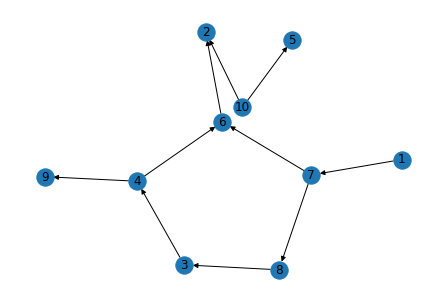

In [3]:
# Create a graph and visualize it
n_vertices = 10 # number of vertices
n_edges = 10 # number of directed edges
vertices = [i+1 for i in range(n_vertices)] # set of vertices
Graph = create_directed_graph(n_vertices, n_edges)
nx.draw_kamada_kawai(Graph, with_labels=True)

# Graph2 = nx.random_tree(20)
# nx.draw_circular(Graph2, with_labels=True)

In [4]:
# Look at the adjacency matrix of the graph
matrix = nx.adjacency_matrix(Graph)
matrix = scipy.sparse.csr_matrix.toarray(matrix)
matrix = pd.DataFrame(matrix, dtype='int32', index=vertices, columns=vertices)
matrix # The adjacency matrix does not match the graph above (possibly correct up to vertex permutation)

,1,2,3,4,5,6,7,8,9,10
1,1,1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,1,0,1,0,0,0,1,0
6,0,0,1,0,0,1,1,0,0,0
7,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,1,0,0
9,0,0,0,0,0,0,0,1,1,0
10,0,0,0,0,1,0,0,0,0,1


In [5]:
# Experiment parameters
n_vertices = 100
min_edges = 1000 # minimum number of edges for simulation
max_edges = 3000 # maximum number of edges for simulation
test_edges = 4000 # number of edges outside simulation range for testing
index = list(range(min_edges, max_edges)) # the range of connectivity
dominating_set_sizes = []
clique_numbers = []

In [6]:
# Conduct the experiment
for i in index:
    G = create_graph(n_vertices, i) # create undirected graph
    x = len(nx.dominating_set(G)) # compute the size of a dominating set
    dominating_set_sizes.append(x)
    y = nx.graph_clique_number(G) # compute the size of a maximal clique
    clique_numbers.append(y)

In [7]:
# Fit curves to observed data
xdata = np.linspace(min_edges, max_edges, len(index))

def func1(x, a, b, c):
    return a*(np.exp(-b*(x-c))) # translated exponential decay function

ydata1 = np.asarray(dominating_set_sizes)
popt1, pcov1 = scipy.optimize.curve_fit(f=func1, xdata=xdata, ydata=ydata1, p0=[max(ydata1), 1, min_edges], method='lm')


def func2(x, a, b):
    return a+b*x # straight line function

ydata2 = np.asarray(clique_numbers)
popt2, pcov2 = scipy.optimize.curve_fit(f=func2, xdata=xdata, ydata=ydata2, p0=[min(ydata2), 1], method='lm')

In [8]:
# Define the functions fitting the data - return integral values within bounds
def dominating_set_fn(n_edges): # returns the size of a dominating set for the given number of edges on 100 vertices
    if func1(n_edges, *popt1) < 1:
        return 1
    if func1(n_edges, *popt1) > n_vertices:
        return n_vertices
    else:
        return int(round(func1(n_edges, *popt1)))

def clique_number_fn(n_edges): # returns the clique number for the given number of edges on 100 vertices
    if func2(n_edges, *popt2) < 1:
        return 1
    if func2(n_edges, *popt2) > n_vertices:
        return n_vertices
    else:
        return int(round(func2(n_edges, *popt2)))

In [9]:
# Compute functions for the test edges (outside simulation range)
print(F'Dominating set size for {test_edges} edges = {dominating_set_fn(test_edges)}')
print(F'Clique number for {test_edges} edges = {clique_number_fn(test_edges)}')

Dominating set size for 4000 edges = 4
Clique number for 4000 edges = 10


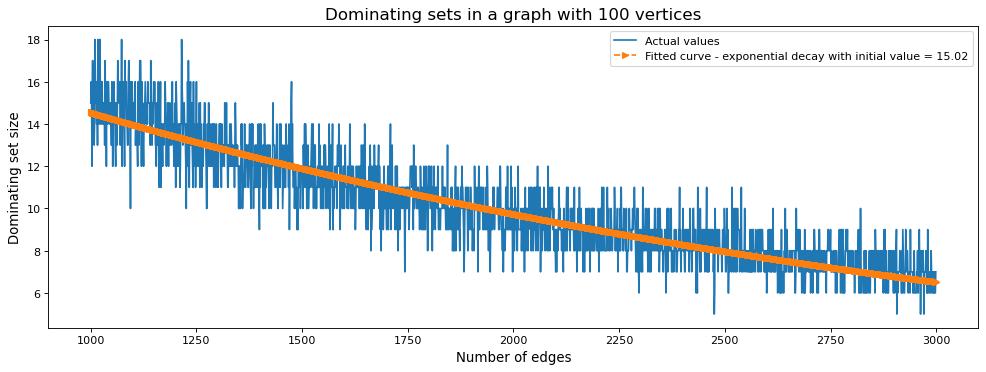

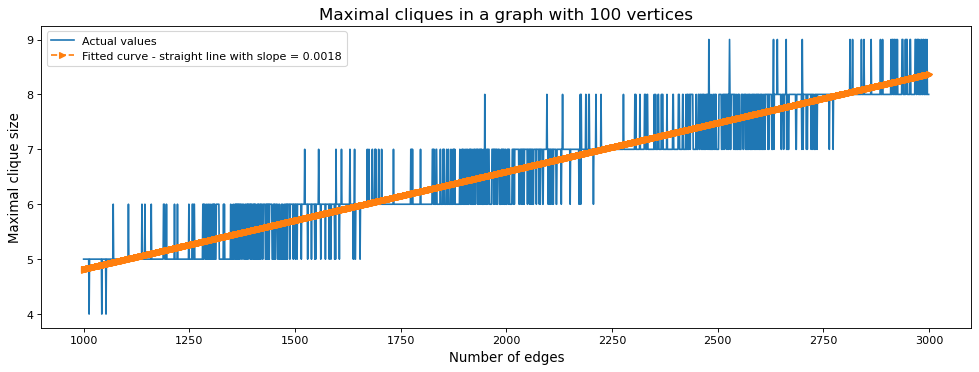

In [10]:
# Plot results

# x-axis values 
x = index
# y-axis values 
y = dominating_set_sizes

# Plot the points 
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y)
plt.plot(xdata, func1(xdata, *popt1), '>--')
legends = [F'Actual values', F'Fitted curve - exponential decay with initial value = {round(popt1[0],2)}']
plt.legend(legends)
plt.xlabel(F'Number of edges', size=12)
plt.ylabel(F'Dominating set size', size=12) 
plt.title(F'Dominating sets in a graph with {n_vertices} vertices', size=15)


# x-axis values 
x = index
# y-axis values 
y = clique_numbers

# Plot the points 
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y)
plt.plot(xdata, func2(xdata, *popt2), '>--')
legends = [F'Actual values', F'Fitted curve - straight line with slope = {round(popt2[1],4)}']
plt.legend(legends)
plt.xlabel(F'Number of edges', size=12)
plt.ylabel(F'Maximal clique size', size=12)
plt.title(F'Maximal cliques in a graph with {n_vertices} vertices', size=15)

plt.show()

In [11]:
# First scenario - further analysis of dominating set size on a fixed number of edges
index = list(range(100))
dominating_set_sizes = []
n_edges = 1500

for _ in index:
    G = create_graph(n_vertices, n_edges)
    x = len(nx.dominating_set(G))
    dominating_set_sizes.append(x)

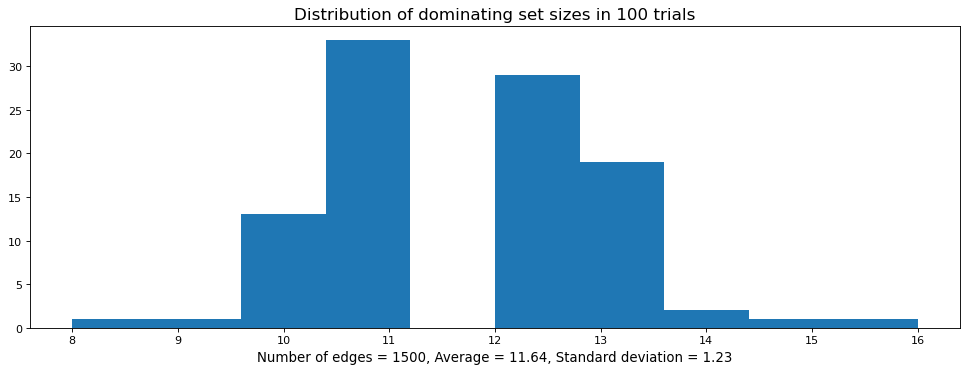

In [12]:
# x-axis values 
x = index
# y-axis values 
y = dominating_set_sizes

# Plot the points 
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.hist(y)

average = round(statistics.mean(dominating_set_sizes), 2)
std_dev = round(statistics.stdev(dominating_set_sizes), 2)

plt.xlabel(F'Number of edges = {n_edges}, Average = {average}, Standard deviation = {std_dev}', size=12)
plt.title(F'Distribution of dominating set sizes in {len(index)} trials', size=15)

plt.show()

In [13]:
# Second scenario - more edges than the first scenario (dominating set sizes expected to drop)
index = list(range(100))
dominating_set_sizes = []
n_edges = 3000

for _ in index:
    G = create_graph(n_vertices, n_edges)
    x = len(nx.dominating_set(G))
    dominating_set_sizes.append(x)

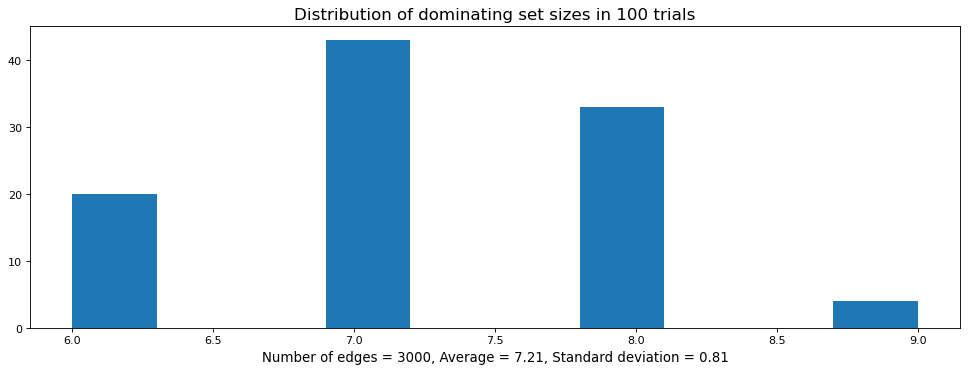

In [14]:
# x-axis values 
x = index
# y-axis values 
y = dominating_set_sizes

# Plot the points 
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.hist(y)

average = round(statistics.mean(dominating_set_sizes), 2)
std_dev = round(statistics.stdev(dominating_set_sizes), 2)

plt.xlabel(F'Number of edges = {n_edges}, Average = {average}, Standard deviation = {std_dev}', size=12)
plt.title(F'Distribution of dominating set sizes in {len(index)} trials', size=15)

plt.show()